In [12]:
# Cell 1: Imports & Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the original dataset
df = pd.read_csv("bank-full.csv", sep=";")
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
# Display the first 5 rows with a slightly larger font (for screenshot)
from IPython.display import display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.precision', 3)       # Optional: control decimal points

display(df.head())


Dataset loaded: 45211 rows, 17 columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# Cell 2: Check Duplicates & 'unknown' Counts

# 1️⃣ Duplicate rows
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

# Count 'unknown' values in every column across the whole dataset
unknown_total = (df == 'unknown').sum()

# Filter only those columns where 'unknown' appears
unknown_total_filtered = unknown_total[unknown_total > 0]

# Display
print("🔍 Columns with 'unknown' values:\n")
print(unknown_total_filtered)


Duplicate rows: 0
🔍 Columns with 'unknown' values:

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


C:\Users\hassa\AppData\Local\Temp\ipykernel_40816\2354323956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_num', data=df, palette='Blues')


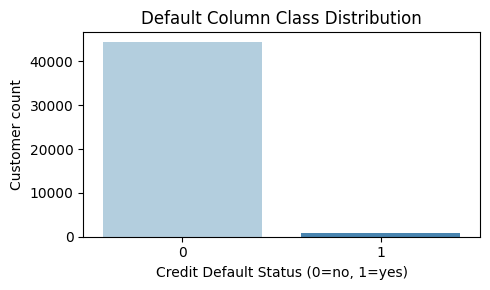

C:\Users\hassa\AppData\Local\Temp\ipykernel_40816\2354323956.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poutcome', data=df,


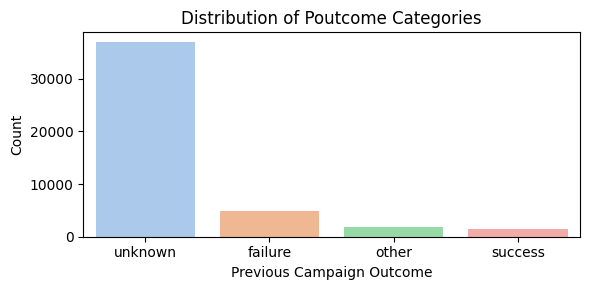

In [14]:
# Cell 3: Default & Poutcome Distributions
# 3️⃣ Default class imbalance
df['default_num'] = df['default'].map({'no': 0, 'yes': 1})
plt.figure(figsize=(5,3))
sns.countplot(x='default_num', data=df, palette='Blues')
plt.title("Default Column Class Distribution")
plt.xlabel("Credit Default Status (0=no, 1=yes)")
plt.ylabel("Customer count")
plt.tight_layout()
plt.show()

# 4️⃣ Poutcome distribution
plt.figure(figsize=(6,3))
sns.countplot(x='poutcome', data=df,
              order=df['poutcome'].value_counts().index,
              palette='pastel')
plt.title("Distribution of Poutcome Categories")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


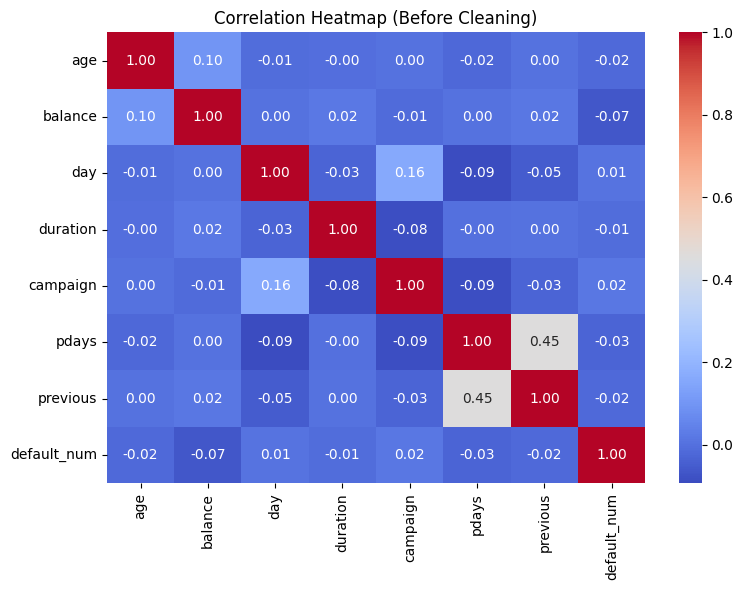

C:\Users\hassa\AppData\Local\Temp\ipykernel_40816\4001201788.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, order=df['job'].value_counts().index, palette='Set2')


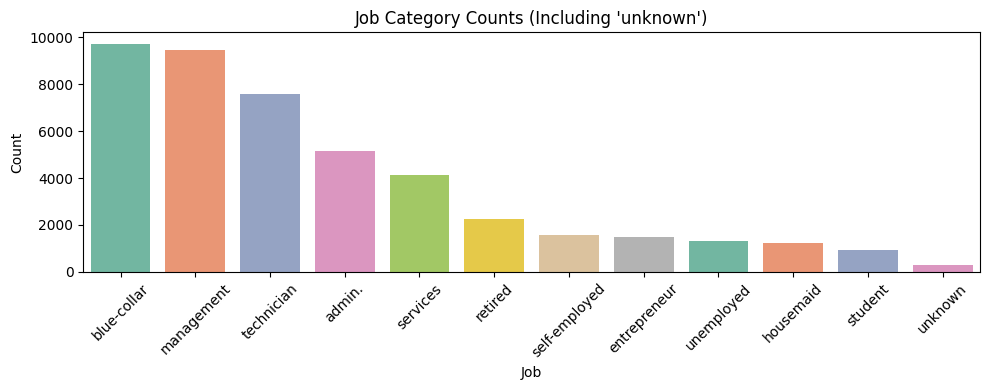

In [10]:
# Cell 4: Correlation & Job Counts BEFORE Cleaning
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# 5️⃣ Heatmap before cleaning
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Before Cleaning)")
plt.tight_layout()
plt.show()

# 6️⃣ Job distribution before cleaning
plt.figure(figsize=(10,4))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title("Job Category Counts (Including 'unknown')")
plt.xlabel("Job")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [15]:
# Cell 5: Remove Outliers & Clean Unknown Jobs/Education
# 7️⃣ Remove outliers on 'balance'
Q1, Q3 = df['balance'].quantile([0.25,0.75])
IQR = Q3 - Q1
low_fence, high_fence = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df_cleaned = df[(df['balance']>=low_fence) & (df['balance']<=high_fence)].copy()

# 8️⃣ Drop 'unknown' jobs
df_cleaned = df_cleaned[df_cleaned['job']!='unknown']

# 9️⃣ Replace 'unknown' education with mode
mode_edu = df_cleaned['education'].mode()[0]
df_cleaned['education'] = df_cleaned['education'].replace({'unknown': mode_edu})

print(f"Rows after cleaning: {df_cleaned.shape[0]}")


Rows after cleaning: 40233


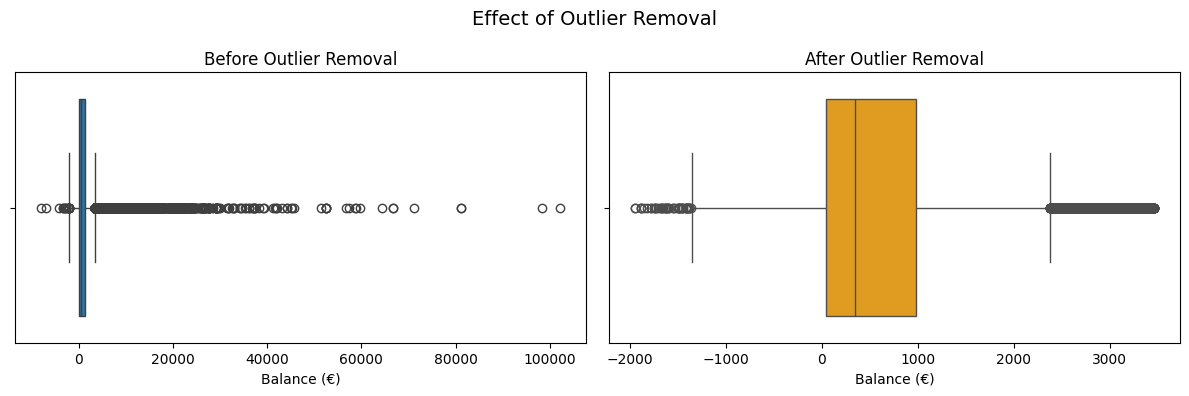

C:\Users\hassa\AppData\Local\Temp\ipykernel_40816\595714874.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df_cleaned, order=df_cleaned['job'].value_counts().index, palette='Set2')


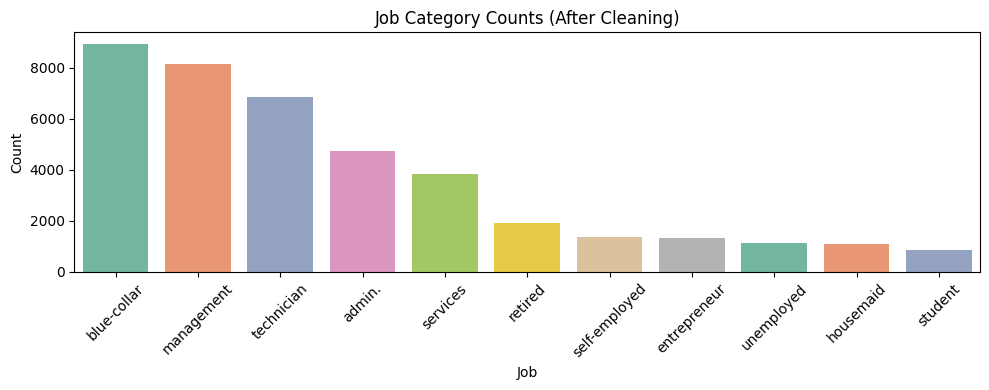

In [16]:
# Cell 6: Comparison Plots (Outlier & Job)
# 🔟 Outlier boxplots
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
sns.boxplot(x=df['balance'], ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].set_xlabel("Balance (€)")
sns.boxplot(x=df_cleaned['balance'], ax=axes[1], color='orange')
axes[1].set_title("After Outlier Removal")
axes[1].set_xlabel("Balance (€)")
fig.suptitle("Effect of Outlier Removal", fontsize=14)
plt.tight_layout()
plt.show()


# 1️⃣1️⃣ Job distribution after cleaning
plt.figure(figsize=(10,4))
sns.countplot(x='job', data=df_cleaned, order=df_cleaned['job'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title("Job Category Counts (After Cleaning)")
plt.xlabel("Job")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


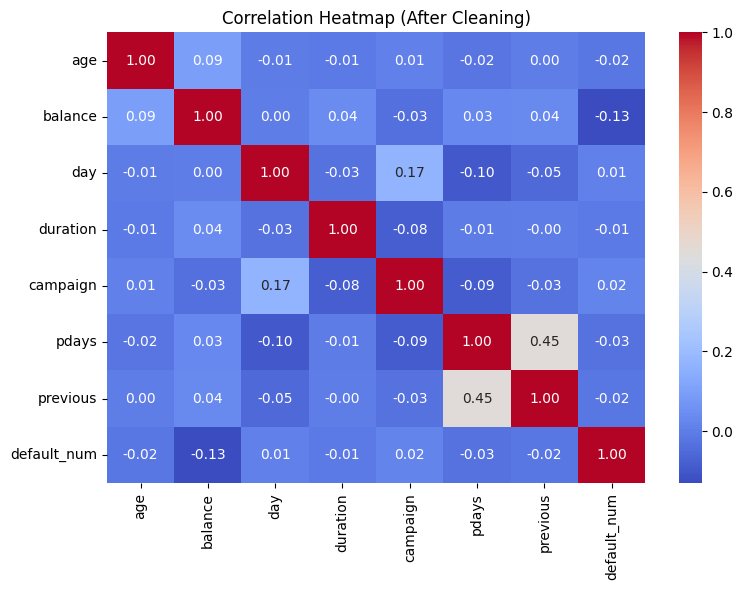

In [17]:
# Cell 7: Correlation AFTER Cleaning
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After Cleaning)")
plt.tight_layout()
plt.show()


In [ ]:
# Cell 8: Save Cleaned Data
df_cleaned.to_csv("bank_cleaned_funda.csv", index=False)
print("✅ Cleaned dataset saved to 'bank_cleaned_finalone.csv'")
